<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r5-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-1-r5.csv?token=AKVFSOBWKYXIRA76WSCXAKC63IPFO')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-11-r5.csv?token=AKVFSOG4BTBXRS6QBNRTBWS63IPFS')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-4-m-1-r5.csv?token=AKVFSOAD6SCZNGAWGNY5B5K63IPFY')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-4-m-11-r5.csv?token=AKVFSOAUSUTTS4YZACOHXWK63IPF2')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-6-m-1-r5.csv?token=AKVFSOBIX4FWQHN3PNSROYC63IPF6')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-6-m-11-r5.csv?token=AKVFSOEOPQYYDLWWZ44JES263IPGC')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-9-m-1-r5.csv?token=AKVFSOEDD5O46YUWQMLOIK263IPGG')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-9-m-11-r5.csv?token=AKVFSOFT6MXUVZQ7ETX4AJS63IPGK')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-15-r5.csv?token=AKVFSOCGSVWLPJVTTUYPXVK63IPGU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-4-r5.csv?token=AKVFSOFKGNJGN7IA7QE3RDS63IPGY')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-6-r5.csv?token=AKVFSOFFPOKXYYSVZXBWPEK63IPHA')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-normal-n-0-9-r5.csv?token=AKVFSODQCBEUVCHTJMWVSYC63IPHE')

In [4]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(73806, 26)
(52701, 26)
(90606, 26)
(69643, 26)
(83817, 26)
(62955, 26)
(82090, 26)
(60712, 26)
(34357, 26)
(51024, 26)
(44745, 26)
(42660, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r4-train.csv',index=False)

In [6]:
df = pd.read_csv('fft-r4-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,4,4,23,7,2,3,1,0.333333,8,69,1,69,69,8,8,3,27,1
1,11,2,4,1,1,4,3,9,4,4,23,7,2,3,1,0.333333,8,86,1,86,86,8,8,3,27,0
2,11,2,4,1,1,4,3,9,4,4,23,7,3,3,1,0.333333,8,124,1,124,124,8,12,3,27,0
3,66,3,2,4,1,1,5,17,23,7,1,1,2,3,2,0.666667,12,128,1,128,128,6,8,20,340,0
4,66,1,2,4,1,1,5,17,23,7,9,9,2,3,2,0.666667,12,72,1,72,72,2,8,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749111,3276597,2,4,4,2,2,5,17,20,4,15,15,30092,5,1,0.200000,9,5,14,18,70,8,481472,20,340,0
749112,3276598,2,4,4,3,2,5,17,20,4,15,15,30092,5,1,0.200000,10,4,15,18,60,8,722208,20,340,0
749113,3276599,2,4,4,4,2,5,17,20,4,15,15,30092,5,1,0.200000,11,3,16,18,48,8,962944,20,340,0
749114,3276600,2,4,3,1,4,3,9,20,4,18,2,30092,3,1,0.333333,12,2,17,18,34,8,361104,9,81,0


In [7]:
df.shape

(749116, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-12-r5.csv?token=AKVFSOFGZZNKP3BWO7VOX4263IPSK')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-15-m-7-r5.csv?token=AKVFSOF5WUCWSF74MB4QTN263IPSO')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-4-m-12-r5.csv?token=AKVFSOESE7NQZBMJMGNJJKS63IPSU')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-4-m-7-r5.csv?token=AKVFSOGD7BYYDJM2ZRYUJMK63IPSY')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-6-m-12-r5.csv?token=AKVFSOEPJ4KVGPURPAON72K63IPS4')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-6-m-7-r5.csv?token=AKVFSODC2EG6QZKGLRW2JSK63IPTK')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-9-m-12-r5.csv?token=AKVFSOGKFGRCG3JTP3NEO2S63IPTE')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r5/2-fft-malicious-n-0-9-m-7-r5.csv?token=AKVFSOA2LSYNW3KZKVGJEMS63IPTO')

In [9]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(50255, 26)
(62551, 26)
(67123, 26)
(79857, 26)
(60189, 26)
(73065, 26)
(58244, 26)
(70972, 26)


In [10]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,80,3,2,4,1,1,5,17,23,7,1,1,2,3,2,0.666667,12,105,1,105,105,6,8,20,340,0
1,81,4,2,1,1,4,3,9,6,6,24,8,4,3,1,0.333333,9,104,2,105,208,8,16,3,27,0
2,82,3,2,4,2,2,5,17,23,7,1,1,2,3,2,0.666667,14,103,3,105,309,6,32,20,340,0
3,83,3,2,4,3,2,5,17,23,7,1,1,2,3,2,0.666667,15,102,4,105,408,6,48,20,340,0
4,84,3,2,4,4,2,5,17,23,7,1,1,2,3,2,0.666667,16,101,5,105,505,6,64,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83812,3266199,4,2,4,1,1,5,17,23,7,0,0,30088,4,2,0.500000,13,5,3,7,15,8,120352,20,340,0
83813,3266200,4,2,4,2,2,5,17,23,7,0,0,30088,4,2,0.500000,14,4,4,7,16,8,481408,20,340,0
83814,3266201,4,2,4,3,2,5,17,23,7,0,0,30088,4,2,0.500000,15,3,5,7,15,8,722112,20,340,0
83815,3266202,4,2,4,4,2,5,17,23,7,0,0,30088,4,2,0.500000,16,2,6,7,12,8,962816,20,340,0


Processing

In [11]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [13]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.250595,-0.020307,0.014424,-0.021815,0.340908,0.339830,-0.007235,0.303156,0.155391,-0.166765,-0.206380,-0.004897,0.025080,0.015047,0.006882,0.536356,-0.022850,0.259028,0.342208,-0.031782
inport,-0.250595,1.000000,-0.166390,-0.005833,0.008821,0.051282,0.005191,-0.059322,0.044429,-0.264342,-0.112474,-0.131291,-0.047385,-0.106367,-0.114621,-0.102984,0.638870,-0.066931,-0.091503,-0.028135,0.040022
cache_coherence_type,-0.020307,-0.166390,1.000000,0.209598,-0.316876,-0.224775,-0.237807,0.048404,-0.070167,-0.117661,-0.157311,-0.164176,0.054700,-0.003150,0.038430,0.032523,-0.169434,0.287735,0.617290,0.105833,0.003071
flit_id,0.014424,-0.005833,0.209598,1.000000,-0.023656,0.242817,0.226803,0.010166,0.044851,0.037675,0.015172,0.390672,-0.029010,0.043069,0.010481,0.007918,-0.002117,0.640279,0.363471,0.311741,-0.010092
flit_type,-0.021815,0.008821,-0.316876,-0.023656,1.000000,-0.367106,-0.342895,-0.015373,-0.067812,-0.056962,-0.022938,0.330012,-0.045788,0.025021,-0.015482,-0.010995,0.003197,0.140110,-0.549512,-0.471307,0.015247
vnet,0.340908,0.051282,-0.224775,0.242817,-0.367106,1.000000,0.990014,-0.017920,0.234116,0.218669,0.108782,-0.406800,-0.025664,0.038230,0.009368,0.000403,0.281612,-0.025799,0.627852,0.942094,-0.088140
vc,0.339830,0.005191,-0.237807,0.226803,-0.342895,0.990014,1.000000,-0.015337,0.209978,0.173770,0.058334,-0.390872,-0.023619,0.049378,0.019203,0.010058,0.245372,-0.030953,0.609379,0.938112,-0.089001
traversal_id,-0.007235,-0.059322,0.048404,0.010166,-0.015373,-0.017920,-0.015337,1.000000,0.004326,0.028547,0.019755,0.038240,0.102486,0.103469,0.153539,0.091527,-0.058010,0.559500,0.024196,-0.001409,-0.247690
hop_count,0.303156,0.044429,-0.070167,0.044851,-0.067812,0.234116,0.209978,0.004326,1.000000,0.465172,-0.136038,0.018915,-0.069803,-0.049602,-0.089015,-0.086544,0.224300,-0.011828,0.132977,0.201752,-0.005178
current_hop,0.155391,-0.264342,-0.117661,0.037675,-0.056962,0.218669,0.173770,0.028547,0.465172,1.000000,0.741069,0.189759,0.009174,0.005147,0.010676,0.000356,-0.143052,-0.016872,0.082568,0.157872,-0.054012


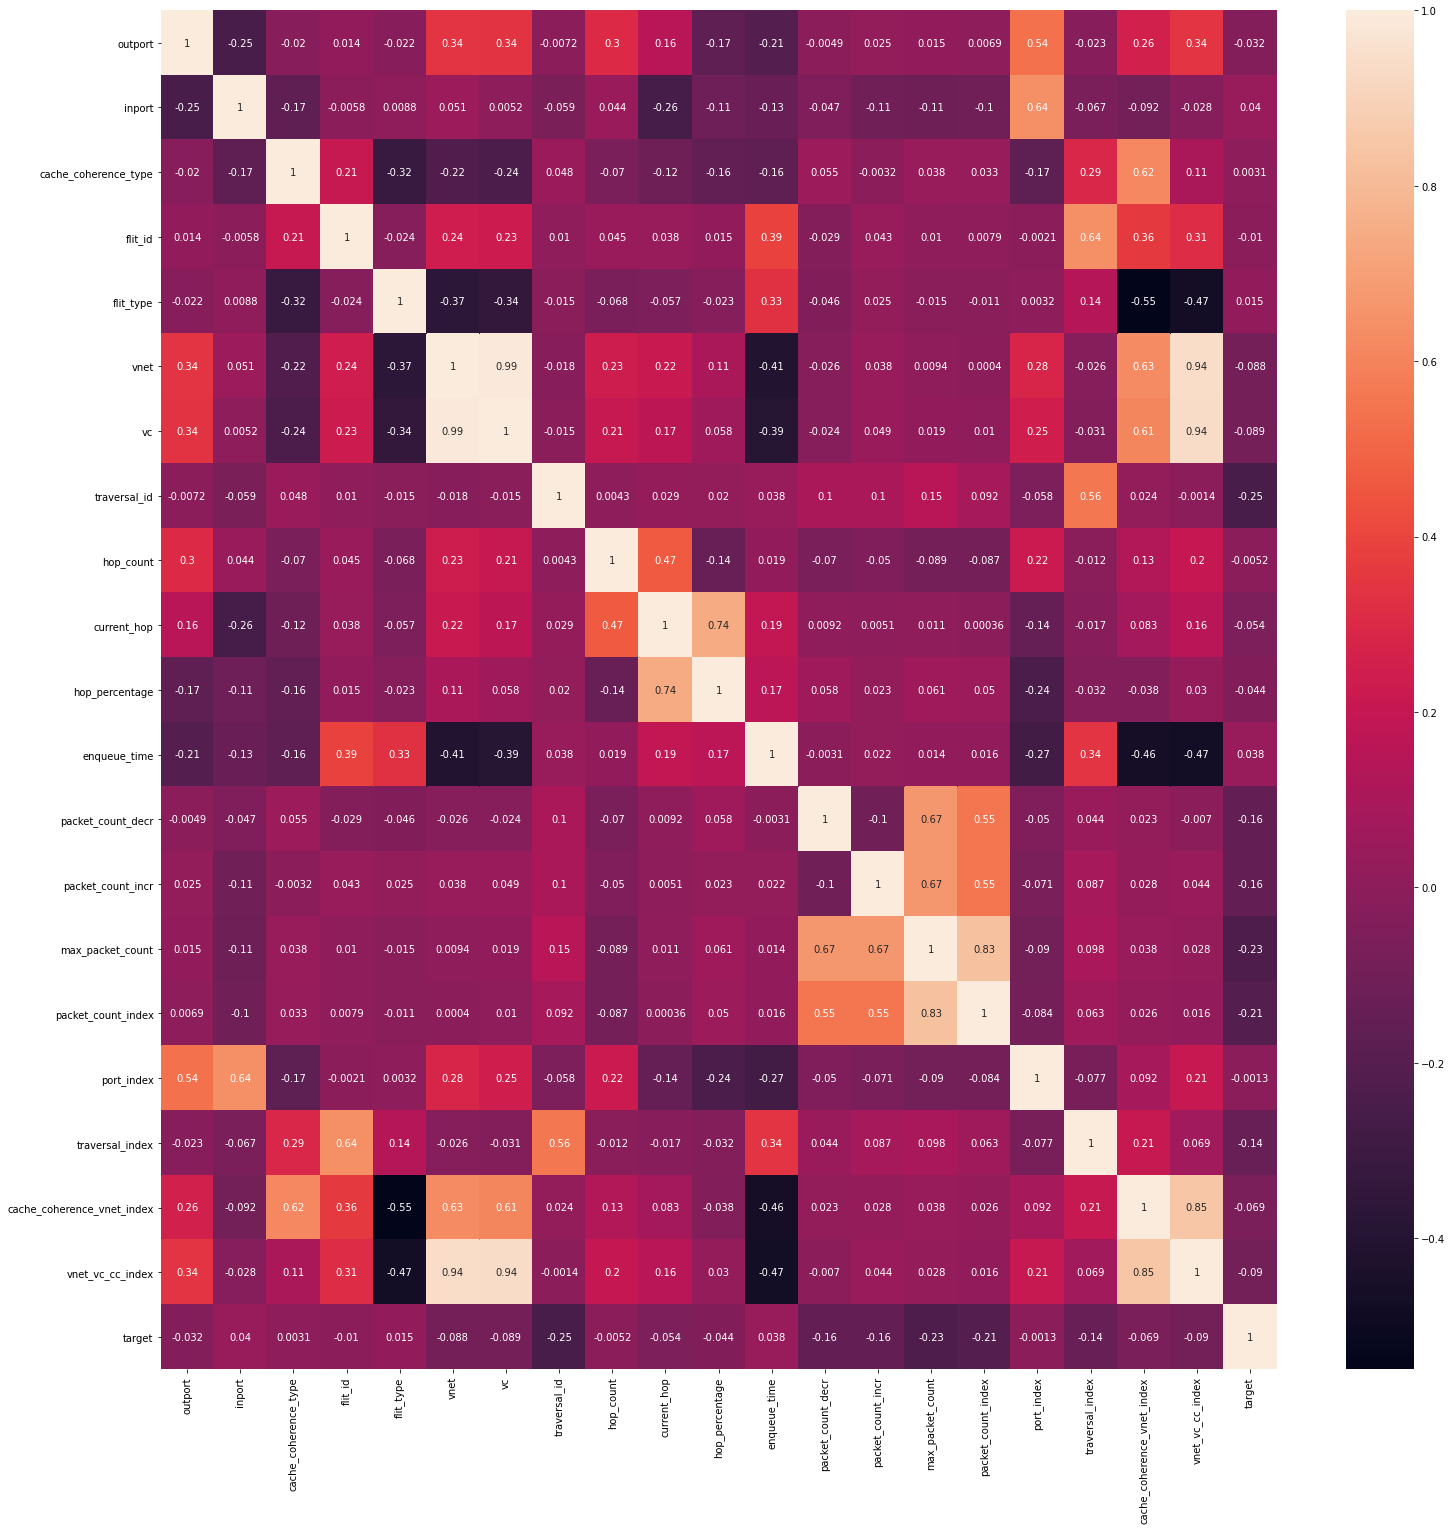

In [14]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [16]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

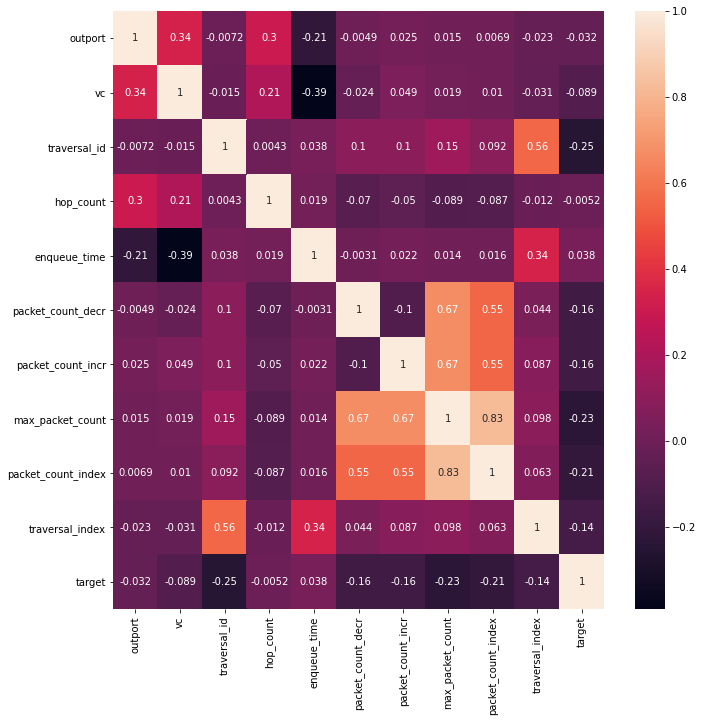

In [18]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

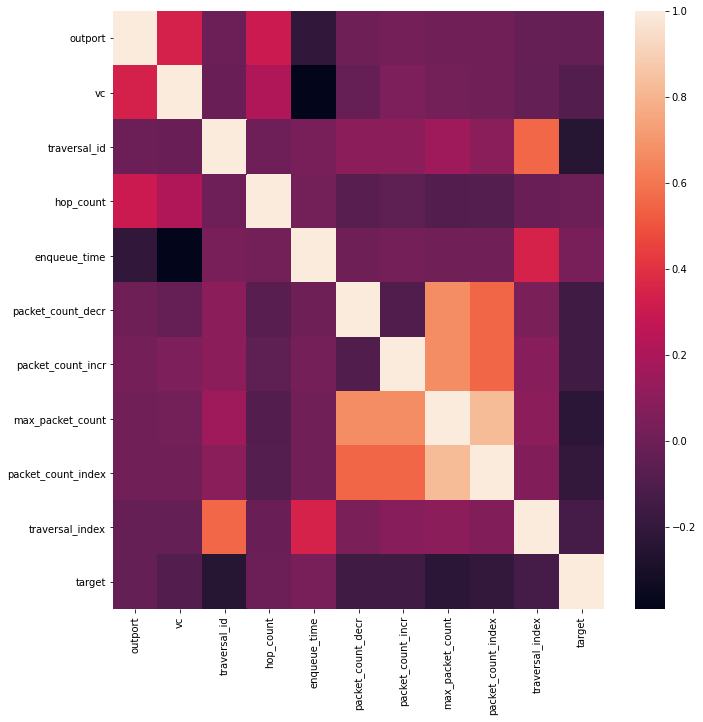

In [19]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [21]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000033,0.5,0.065574,0.414634,0.000000,0.414634,0.009872,0.000001
1,0.50,0.000000,0.000033,0.5,0.065574,0.518293,0.000000,0.518293,0.012340,0.000001
2,0.50,0.000000,0.000066,0.5,0.065574,0.750000,0.000000,0.750000,0.017857,0.000003
3,0.75,0.888889,0.000033,0.5,0.131148,0.774390,0.000000,0.774390,0.018438,0.000001
4,0.25,0.888889,0.000033,0.5,0.131148,0.432927,0.000000,0.432927,0.010308,0.000001
...,...,...,...,...,...,...,...,...,...,...
749111,0.50,0.888889,1.000000,1.0,0.081967,0.024390,0.079268,0.103659,0.010017,0.178007
749112,0.50,0.888889,1.000000,1.0,0.098361,0.018293,0.085366,0.103659,0.008566,0.267012
749113,0.50,0.888889,1.000000,1.0,0.114754,0.012195,0.091463,0.103659,0.006823,0.356016
749114,0.50,0.000000,1.000000,0.5,0.131148,0.006098,0.097561,0.103659,0.004791,0.133505


In [22]:
train_X[train_X.duplicated()].shape

(2739, 10)

In [23]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,1.0,0.888889,0.0,0.666667,0.129032,0.614173,0.000000,0.614173,0.018755,0.000000
1,1.0,0.888889,0.0,0.666667,0.145161,0.606299,0.007874,0.614173,0.037269,0.000004
2,1.0,0.888889,0.0,0.666667,0.161290,0.598425,0.015748,0.614173,0.055302,0.000007
3,1.0,0.888889,0.0,0.666667,0.177419,0.590551,0.023622,0.614173,0.072854,0.000010
4,1.0,0.888889,0.0,0.666667,0.241935,0.582677,0.031496,0.614173,0.089925,0.000021
...,...,...,...,...,...,...,...,...,...,...
50250,0.5,0.888889,1.0,1.000000,0.080645,0.031496,0.102362,0.133858,0.016591,0.044501
50251,0.5,0.888889,1.0,1.000000,0.096774,0.023622,0.110236,0.133858,0.014186,0.178007
50252,0.5,0.888889,1.0,1.000000,0.112903,0.015748,0.118110,0.133858,0.011301,0.267012
50253,0.5,0.888889,1.0,1.000000,0.129032,0.007874,0.125984,0.133858,0.007935,0.356016


In [24]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [25]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [26]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [27]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [28]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [29]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [30]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [32]:
train_Y = df['target']
train_Y.value_counts()

0    576330
1    172786
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  6150.023835
7    max_packet_count  3782.252557
8  packet_count_index  3443.807216
1                  vc  2205.250708
6   packet_count_incr  1902.913847
5   packet_count_decr  1879.377005
9     traversal_index  1846.237715
4        enqueue_time   101.298212
0             outport    89.321641
3           hop_count     1.937755


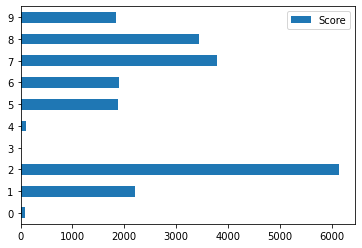

In [35]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k="all")
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r5.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [40]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.61449176695167
Test Prediction Score 94.4608340452798


In [41]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 85.75067157496767
Test Prediction Score 87.15448194273473
Test Prediction Score 89.48050593686217
Test Prediction Score 88.77368295828794
Test Prediction Score 87.69044177507517
Test Prediction Score 88.4760145076302
Test Prediction Score 86.98750085845752
Test Prediction Score 87.6683762610607


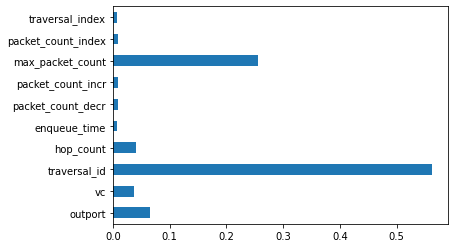

In [42]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

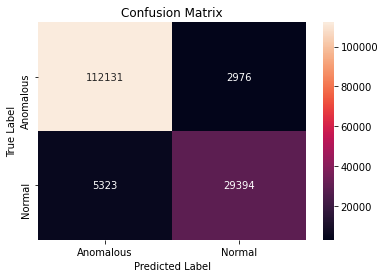

In [43]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    115107
           1       0.91      0.85      0.88     34717

    accuracy                           0.94    149824
   macro avg       0.93      0.91      0.92    149824
weighted avg       0.94      0.94      0.94    149824



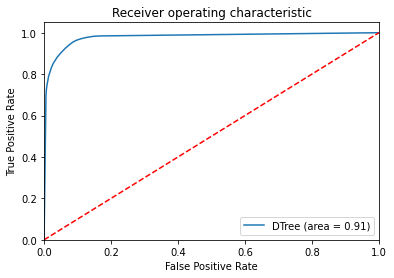

In [45]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r5l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99165682171629
Test Prediction Score 99.35324113626656


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.93154909959208
Test Prediction Score 88.53575482406356
Test Prediction Score 90.59934746659118
Test Prediction Score 89.5275304606985
Test Prediction Score 88.71886889630996
Test Prediction Score 89.97194279066585
Test Prediction Score 88.15500309044708
Test Prediction Score 89.19714817110973


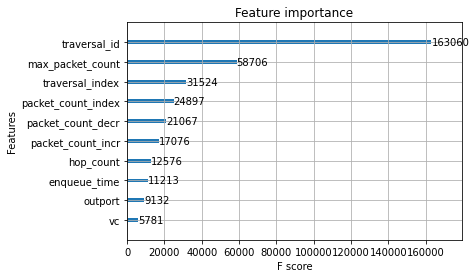

In [52]:
plot_importance(xgbc)
plt.show()

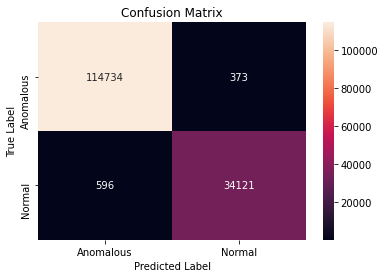

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    115107
           1       0.99      0.98      0.99     34717

    accuracy                           0.99    149824
   macro avg       0.99      0.99      0.99    149824
weighted avg       0.99      0.99      0.99    149824



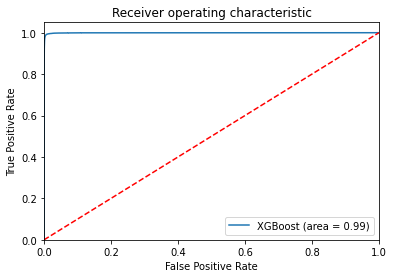

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()